<a href="https://colab.research.google.com/github/Toshiki18/CNN_basemodel/blob/main/DenseNet_basemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#１回目だけ
import shutil
import os
new_dir_path = '/content/drive/MyDrive/02_PBL02_data 2/train_val'
os.mkdir(new_dir_path)

In [ ]:
move_dir = '/content/drive/MyDrive/02_PBL02_data 2/train_val'
regular_dir = '/content/drive/MyDrive/02_PBL02_data 2/train/regular'
list_file_name =  os.listdir(regular_dir)

for i_file_name in list_file_name:

    join_path = os.path.join(regular_dir,i_file_name)
    move_path = os.path.join(move_dir,i_file_name)

    if os.path.isfile(join_path):
        shutil.move(join_path,move_path)

In [ ]:
#１回目だけ
bridge_dir = '/content/drive/MyDrive/02_PBL02_data 2/train/bridge'
list_file_name =  os.listdir(bridge_dir)

for i_file_name in list_file_name:

    join_path = os.path.join(bridge_dir,i_file_name)
    move_path = os.path.join(move_dir,i_file_name)

    if os.path.isfile(join_path):
        shutil.move(join_path,move_path)

In [ ]:
#１回目だけ
horn_dir = '/content/drive/MyDrive/02_PBL02_data 2/train/horn'
list_file_name =  os.listdir(horn_dir)

for i_file_name in list_file_name:

    join_path = os.path.join(horn_dir,i_file_name)
    move_path = os.path.join(move_dir,i_file_name)

    if os.path.isfile(join_path):
        shutil.move(join_path,move_path)

In [ ]:
#１回目だけ
potato_dir = '/content/drive/MyDrive/02_PBL02_data 2/train/potato'
list_file_name =  os.listdir(potato_dir)

for i_file_name in list_file_name:

    join_path = os.path.join(potato_dir,i_file_name)
    move_path = os.path.join(move_dir,i_file_name)

    if os.path.isfile(join_path):
        shutil.move(join_path,move_path)

In [ ]:
# ライブラリをインポートする
import pandas as pd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import exposure
import seaborn as sns

# データの読み込み
df = pd.read_table('/content/drive/MyDrive/02_PBL02_data 2/train_master.tsv')

# データの先頭15行の表示
#df.head(15)

# データの要約情報を表示する
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  290 non-null    object
 1   flag       290 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB
None


In [ ]:
flag = df['flag']

print(flag)

flag.value_counts()

0      1
1      1
2      1
3      1
4      1
      ..
285    0
286    0
287    0
288    0
289    0
Name: flag, Length: 290, dtype: int64


1    190
0    100
Name: flag, dtype: int64

In [ ]:
for i in range(len(flag)):
  if 'bridge' in df['file_name'][i]:
    df['flag'][i] = 1
  elif 'horn' in df['file_name'][i]:
    df['flag'][i] = 2
  elif 'potato' in df['file_name'][i]:
    df['flag'][i] = 3

<ipython-input-4-b277d96fa10a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][i] = 1
<ipython-input-4-b277d96fa10a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][i] = 2
<ipython-input-4-b277d96fa10a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][i] = 3


In [ ]:
flag = df['flag']

print(flag)

flag.value_counts()

0      1
1      1
2      1
3      1
4      1
      ..
285    0
286    0
287    0
288    0
289    0
Name: flag, Length: 290, dtype: int64


3    103
0    100
2     57
1     30
Name: flag, dtype: int64

In [ ]:
image_dir = '/content/drive/MyDrive/02_PBL02_data 2/train_val/'

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [ ]:
master = df

In [ ]:
image_name_list = master['file_name'].values
label_list = master['flag'].values

In [ ]:
print(image_name_list)

['bridge_000.jpeg' 'bridge_001.jpeg' 'bridge_002.jpeg' 'bridge_003.jpeg'
 'bridge_004.jpeg' 'bridge_005.jpeg' 'bridge_006.jpeg' 'bridge_007.jpeg'
 'bridge_008.jpeg' 'bridge_009.jpeg' 'bridge_010.jpeg' 'bridge_011.jpeg'
 'bridge_012.jpeg' 'bridge_013.jpeg' 'bridge_014.jpeg' 'bridge_015.jpeg'
 'bridge_016.jpeg' 'bridge_017.jpeg' 'bridge_018.jpeg' 'bridge_019.jpeg'
 'bridge_020.jpeg' 'bridge_021.jpeg' 'bridge_022.jpeg' 'bridge_023.jpeg'
 'bridge_024.jpeg' 'bridge_025.jpeg' 'bridge_026.jpeg' 'bridge_027.jpeg'
 'bridge_028.jpeg' 'bridge_029.jpeg' 'horn_000.jpeg' 'horn_001.jpeg'
 'horn_002.jpeg' 'horn_003.jpeg' 'horn_004.jpeg' 'horn_005.jpeg'
 'horn_006.jpeg' 'horn_007.jpeg' 'horn_008.jpeg' 'horn_009.jpeg'
 'horn_010.jpeg' 'horn_011.jpeg' 'horn_012.jpeg' 'horn_013.jpeg'
 'horn_014.jpeg' 'horn_015.jpeg' 'horn_016.jpeg' 'horn_017.jpeg'
 'horn_018.jpeg' 'horn_019.jpeg' 'horn_020.jpeg' 'horn_021.jpeg'
 'horn_022.jpeg' 'horn_023.jpeg' 'horn_024.jpeg' 'horn_025.jpeg'
 'horn_026.jpeg' 'horn_027.jpe

In [ ]:
# transformsの定義
from torchvision import transforms

transform = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]), #カラーの場合はつける

    ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((256, 256)),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]), #カラーの場合はつける
    ])
}

In [ ]:
import cv2

def cut(img):
    #ファイルを読み込む
    #img = cv2.imread(i)
    #Grayscaleにする
    imggray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #廻りの白いところと基板を２値化で白黒にする
    region = np.where(imggray < 80, 0, 255).astype(np.uint8)
    #白黒を反転
    region_not = cv2.bitwise_not(region)
    #輪郭を抽出
    contours, hierarchy = cv2.findContours(region_not, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x1 = [] #x座標の最小値を入れる
    y1 = [] #y座標の最小値を入れる
    x2 = [] #x座標の最大値を入れる
    y2 = [] #y座標の最大値を入れる
    for j in range(1, len(contours)):# i = 1 は画像全体の外枠になるのでカウントに入れない
        #輪郭の領域を取り出す
        ret = cv2.boundingRect(contours[j])
        #座標を入れていく
        x1.append(ret[0])
        y1.append(ret[1])
        x2.append(ret[0] + ret[2])
        y2.append(ret[1] + ret[3])
    #座標の中の外枠を取り出す。ちょっと(20)大きく取り出した
    x1_min = min(x1)-20
    y1_min = min(y1)-20
    x2_max = max(x2)+20
    y2_max = max(y2)+20

    #print(x1_min)
    #print(x2_max)
    #print(y1_min)
    #print(y2_max)
    #輪郭を表示する

    #基板の輪郭で画像を切り取る
    img = img[y1_min:y2_max,x1_min:x2_max]
    return img

    #ファイル名のみ取り出す
    #i_base = os.path.splitext(os.path.basename(i))[0]
    #ファイル名の前にcutとつける
    #save_name = ".\\cut\\cut_" + i_base + ".jpg"
    #保存する
    #cv2.imwrite(save_name,cut_img)
    #cv2.rectangle(img, (x1_min, y1_min), (x2_max, y2_max), (0, 0, 255), 10)


In [ ]:
# 学習用、検証用の分割
x_train, x_val, y_train, y_val = train_test_split(image_name_list, label_list, test_size=0.3, stratify=label_list, random_state=42)

# Datasetクラスの設定
class SatelliteDataset(Dataset):
    def __init__(self, image_name_list, label_list, phase=None):
        self.image_name_list = image_name_list
        self.label_list = label_list
        self.phase = phase

    def __len__(self, ):
        return len(self.image_name_list)

    def __getitem__(self, index):

        # index番目の画像を読み込み、前処理を行う
        image_path = self.image_name_list[index]
        image = io.imread(image_dir + image_path)
        #image = rgb2gray(image) #グレースケール
        #image = exposure.equalize_hist(image) #グレースケール
        image = cut(image)
        image = transform[self.phase](image)

        # 画像のラベルを取得する
        label = self.label_list[index]

        # 入力データと正解ラベルをセットで返す
        return image, label

In [ ]:
# 空欄に'train'or'val'の値を代入し、正しくインスタンスを作成してください
train_dataset = SatelliteDataset(x_train, y_train, phase='train')
val_dataset = SatelliteDataset(x_val, y_val, phase='val')

In [ ]:
# ライブラリのインポート
from torch.utils.data import DataLoader

# DataLoaderのインスタンス作成
batch_size = 32
train_dataloader = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size = batch_size, shuffle=True)

In [ ]:
# データローダーを辞書として格納する
dataloaders_dict = {
    'train' : train_dataloader,
    'val' : val_dataloader
}

In [ ]:
import torch
#model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 91.3MB/s]


In [ ]:
from torch import nn, optim

In [ ]:
model.classifier = nn.Linear(in_features=1024, out_features=4, bias=True)

In [ ]:
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
import torch.nn.functional as F

class FocalLoss(nn.modules.loss._WeightedLoss):
    def __init__(self, weight=None, gamma=2,reduction='mean'):
        super(FocalLoss, self).__init__(weight,reduction=reduction)
        self.gamma = gamma
        self.weight = weight #weight parameter will act as the alpha parameter to balance class weights

    def forward(self, input, target):

        ce_loss = F.cross_entropy(input, target,reduction=self.reduction,weight=self.weight)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma * ce_loss).mean()
        return focal_loss

In [ ]:

# 損失関数の設定
#loss_fn = nn.CrossEntropyLoss()
loss_fn = FocalLoss()
# 最適化手法の設定 net.parameters()を更新するパラメータとして設定する
optimizer = optim.Adam(model.parameters())

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
def train_model(net, epochs, loss_fn, optimizer):

    # 学習に使用する機器(device)の設定
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # モデルを設定した機器(device)に移動する
    net.to(device)

    # ベストスコアの初期値
    best_F1 = 0.0

    for epoch in range(epochs):

        # 現在のエポック数の出力
        print(f'Epoch: {epoch+1} / {epochs}')
        print('--------------------------')

        # 毎エポック: 学習、検証を別々に行う　phaseで学習or検証を参照
        for phase in ['train', 'val']:

            # 学習モード、検証モードの切替
            if phase == 'train':
                net.train()
            else:
                net.eval()

            # 損失値のリセット
            epoch_loss = 0.0
            # 予測値リストのリセット
            pred_list = []
            # 正解値リストのリセット
            true_list = []

            # dataloaderから、ミニバッチ(batch_size)単位でのデータの読み込み
            for images, labels in dataloaders_dict[phase]:

                # 入力データ、正解ラベルをモデルと同じdeviceへ移動
                images = images.float().to(device)
                labels = labels.to(device)

                # 勾配情報の初期化
                optimizer.zero_grad()

                # 学習時のみ勾配情報を有効に
                with torch.set_grad_enabled(phase=='train'):

                    # モデルによる計算
                    outputs = net(images)
                    # 損失値の計算
                    #outputs = outputs.unsqueeze(1)
                    loss = loss_fn(outputs, labels)
                    #loss = loss.unsqueeze(1)
                    # 予測ラベルの算出
                    _, preds = torch.max(outputs, 1)
                    # 学習時のみ、バックプロパゲーションとパラメータ更新
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                    # 損失値の追加
                    epoch_loss += loss.item() * images.size(0)

                    # 予測ラベルの追加
                    preds = preds.to('cpu').numpy()
                    pred_list.extend(preds)

                    # 正解ラベルの追加
                    labels = labels.to('cpu').numpy()
                    true_list.extend(labels)

                    # 1エポック内における損失値の平均
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)

            # 混同行列の各値の算出
            #tn, fp, fn, tp = confusion_matrix(true_list, pred_list).flatten()
            # IoUの算出
            #epoch_iou = tp / (tp + fp + fn)
            #recall = tp / (tp + fn)
            #pre = tp / (tp + fp)

            #F1 = 2 * recall * pre / (recall + pre)
            F1 = f1_score(true_list, pred_list, average='micro')
            cm = confusion_matrix(true_list, pred_list)
            cm = pd.DataFrame(data=cm, index=["0", "1", "2", "3"],
                           columns=["regular", "bridge", "horn", "potato"])
            #sns.heatmap(cm, annot=True)

            # 各評価スコアの出力
            print(f'{phase} Loss: {epoch_loss:.4f} F1: {F1:.4f}')

            plt.figure()
            plt.xlabel("Pre", fontsize=13)
            plt.ylabel("GT", fontsize=13)
            sns.heatmap(cm, annot=True)
            # 検証時、検証スコアとベストスコアの大小比較を行う
            if (phase == 'val') and (F1 > best_F1):

                ## 検証スコアが上回った場合のみ以下の処理を行う。

                # ベストスコアの更新
                best_F1 = F1
                # パラメータの名前を指定
                param_name = f'Epoch{epoch+1}_F1_{F1:.4f}.pth'
                # パラメータの保存
                torch.save(net.state_dict(), param_name)
                plt.figure()
                plt.xlabel("Pre", fontsize=13)
                plt.ylabel("GT", fontsize=13)
                sns.heatmap(cm, annot=True)
                plt.savefig(f'Epoch{epoch+1}_F1_{F1:.4f}.png')
            #param_name = f'Epoch{epoch+1}_F1_{F1:.4f}.pth'
            #torch.save(net.state_dict(), param_name)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


Epoch: 1 / 10
--------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


train Loss: 0.7148 F1: 0.4267


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


val Loss: 1.8466 F1: 0.3448
Epoch: 2 / 10
--------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


train Loss: 0.2882 F1: 0.6552


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


val Loss: 1.0902 F1: 0.5345
Epoch: 3 / 10
--------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


train Loss: 0.1345 F1: 0.7845


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


val Loss: 0.6321 F1: 0.5517
Epoch: 4 / 10
--------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


train Loss: 0.0720 F1: 0.8103


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


val Loss: 0.9984 F1: 0.5172
Epoch: 5 / 10
--------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


train Loss: 0.0848 F1: 0.7974


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


val Loss: 1.2687 F1: 0.5862
Epoch: 6 / 10
--------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


train Loss: 0.1834 F1: 0.7500


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


val Loss: 1.0393 F1: 0.5862
Epoch: 7 / 10
--------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


train Loss: 0.0691 F1: 0.8147


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


val Loss: 0.5125 F1: 0.6552
Epoch: 8 / 10
--------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


train Loss: 0.0473 F1: 0.8707


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


val Loss: 0.4422 F1: 0.6379
Epoch: 9 / 10
--------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


train Loss: 0.0417 F1: 0.8836


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


val Loss: 0.1953 F1: 0.7069
Epoch: 10 / 10
--------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


train Loss: 0.1331 F1: 0.7974


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


val Loss: 0.7544 F1: 0.5690


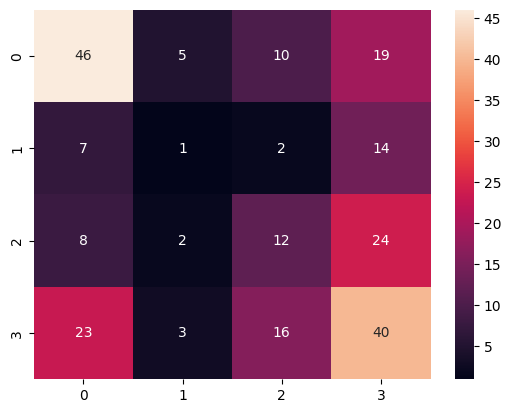

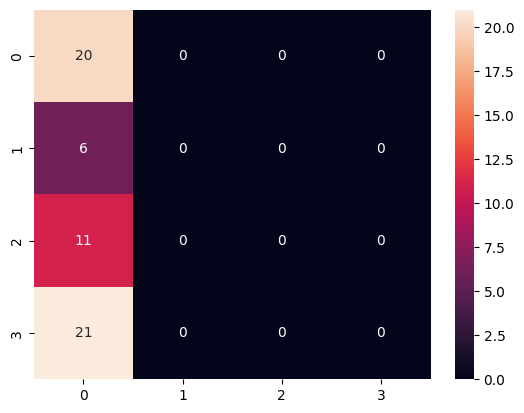

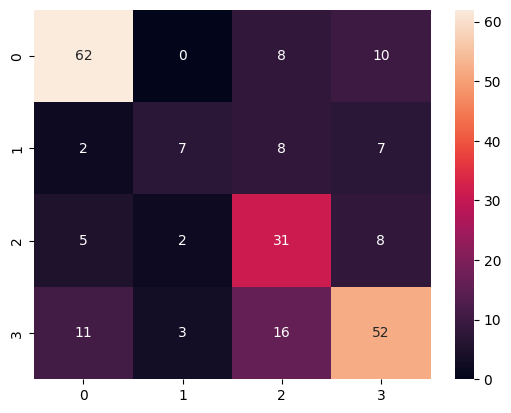

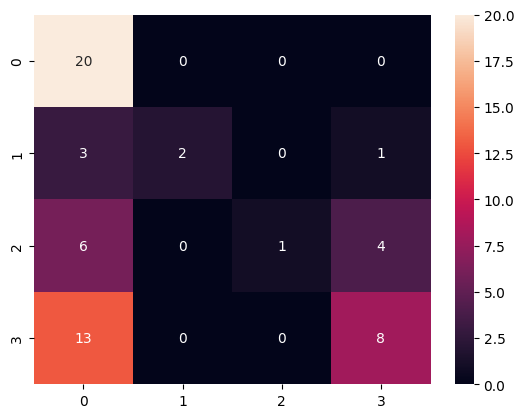

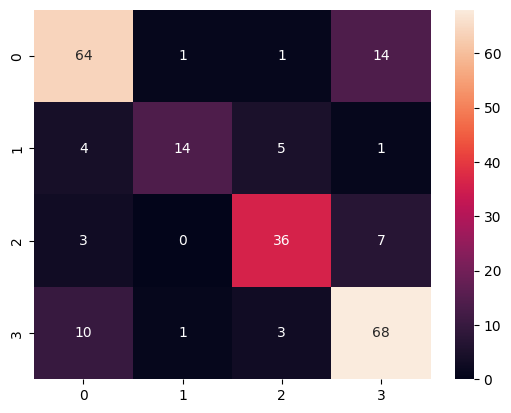

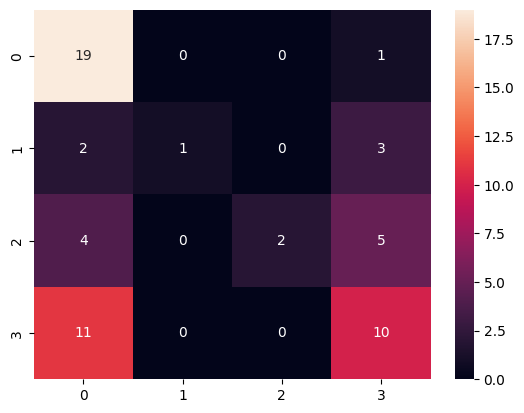

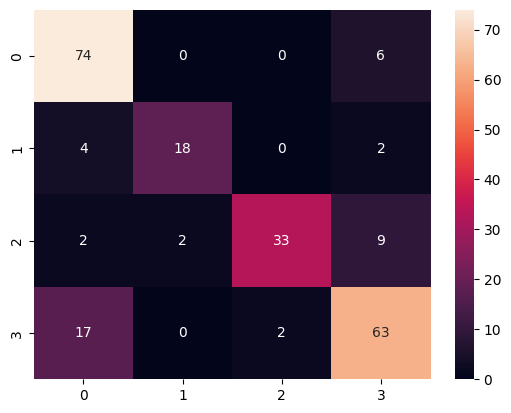

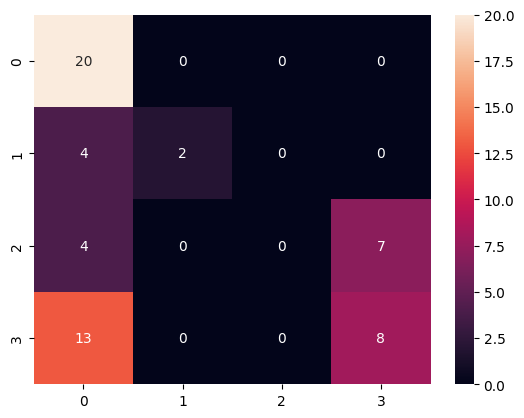

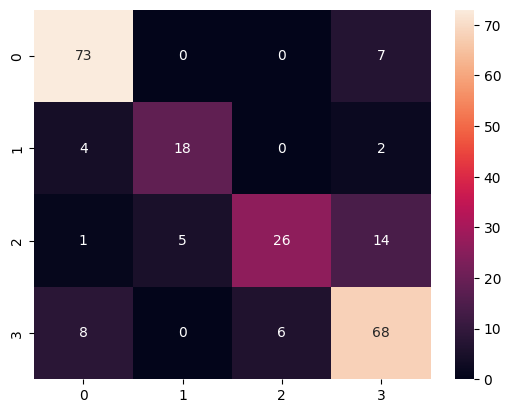

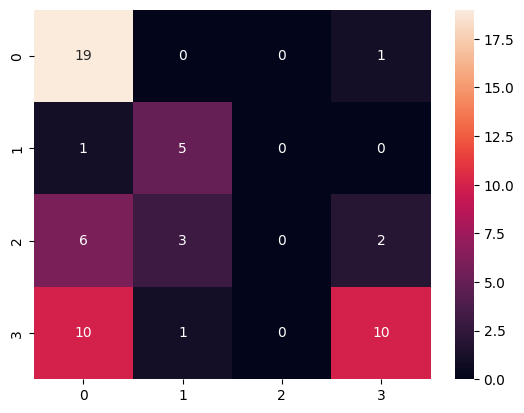

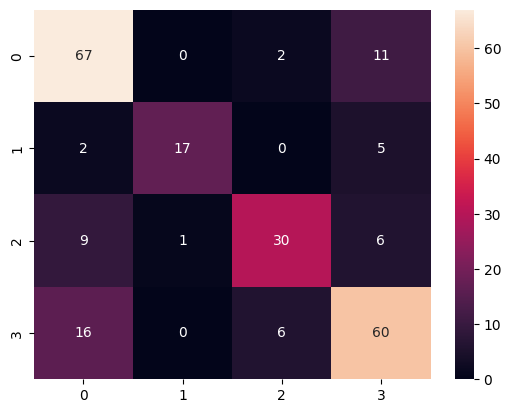

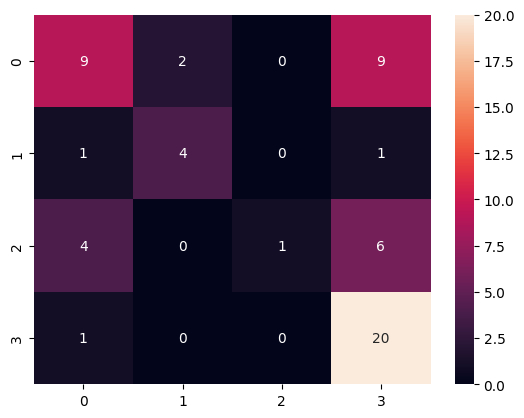

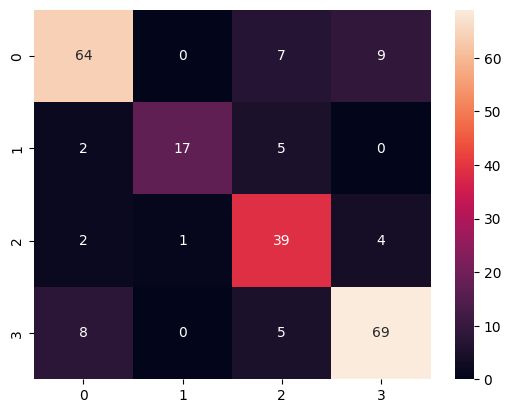

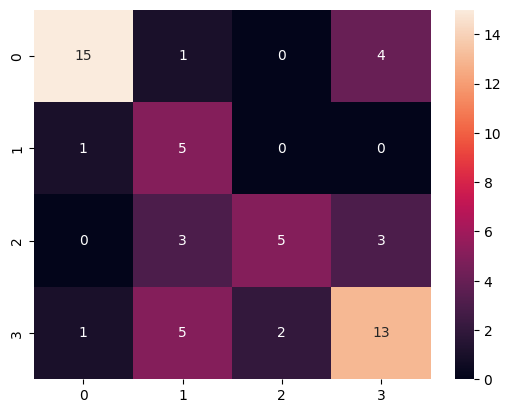

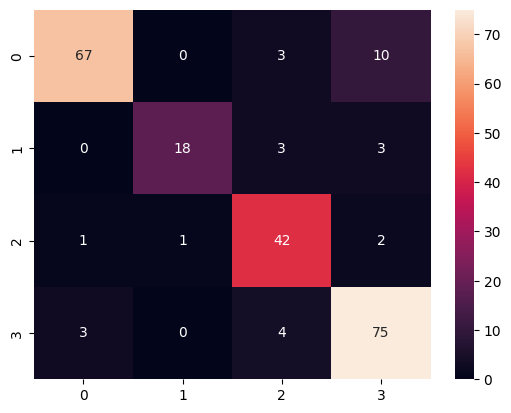

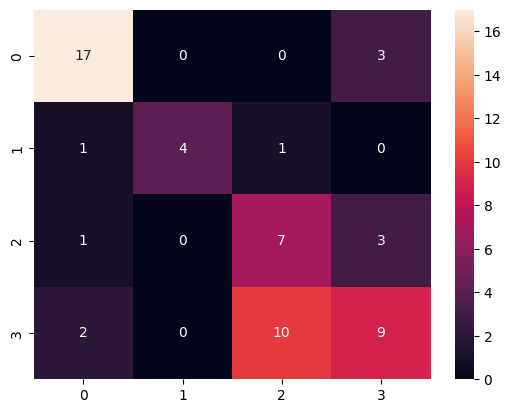

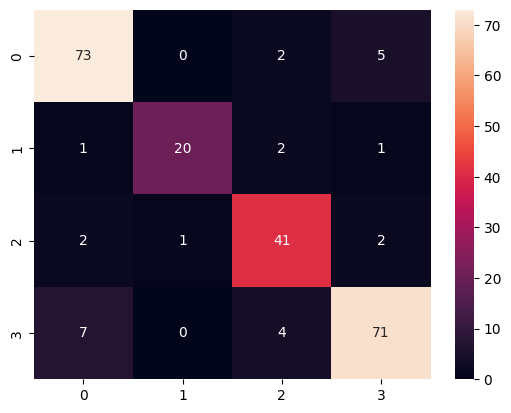

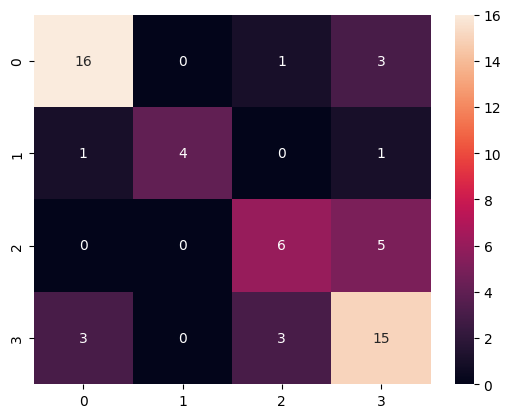

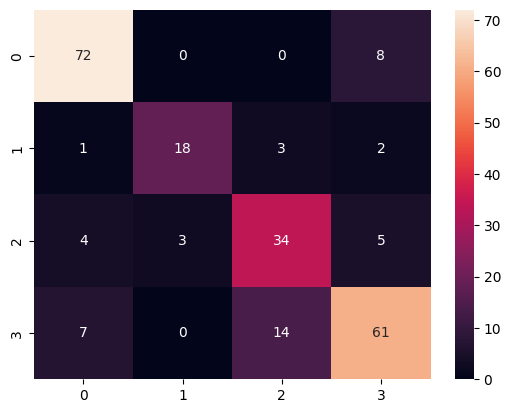

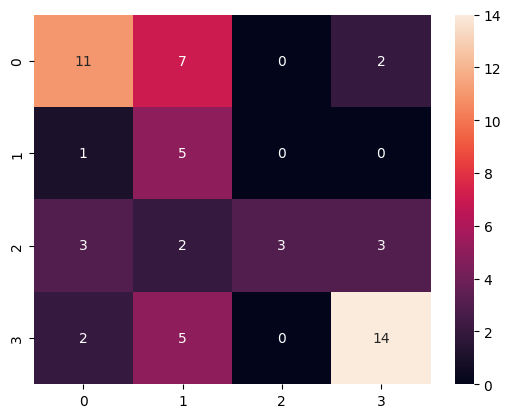

In [ ]:
epochs = 10

train_model(model, epochs, loss_fn, optimizer)

In [ ]:
# 予測を行うdevice(CPU or GPU)の指定
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# 学習済みパラメータの読み込み
trained_params = torch.load('Epoch10_F1_0.8276.pth', map_location=device)

In [ ]:
# モデルにパラメータをロード
model.load_state_dict(trained_params)

<All keys matched successfully>

In [ ]:
# test_master.csvの読み込み
test_master = pd.read_table('/content/drive/MyDrive/02_PBL02_data 2/sample_submit.tsv', header = None)

In [ ]:
test_master.columns = ['file_name', 'flag']

In [ ]:
print(test_master)

    file_name  flag
0    000.jpeg     0
1    001.jpeg     0
2    002.jpeg     0
3    003.jpeg     0
4    004.jpeg     0
..        ...   ...
208  208.jpeg     0
209  209.jpeg     0
210  210.jpeg     0
211  211.jpeg     0
212  212.jpeg     0

[213 rows x 2 columns]


In [ ]:
# 入力データ、ダミーラベルの設定
x_test = test_master['file_name'].values
dummy = test_master['flag'].values

In [ ]:
image_dir = '/content/drive/MyDrive/02_PBL02_data 2/test/'

In [ ]:
# データセットの設定
test_dataset = SatelliteDataset(x_test, dummy, phase='val')

In [ ]:
# データローダーの設定
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# 予測ラベルを格納するリストを初期化
pred_list = []

# test_dataloaderから、ミニバッチ単位でデータを読み込む
for images, _ in test_dataloader:

    # 入力データをdeviceへ
    images = images.float().to(device)

    # モデルによる変換
    outputs = model(images)

    # 出力値を予測値へ変換
    _, preds = torch.max(outputs, 1)
    preds = preds.to('cpu').numpy()

    # 予測値をリストに追加
    pred_list.extend(preds)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
print(type(pred_list))
print(pred_list)

<class 'list'>
[0, 0, 2, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 3, 3, 3, 1, 0, 0, 1, 2, 3, 0, 0, 2, 1, 0, 1, 0, 0, 3, 0, 0, 2, 3, 0, 0, 1, 3, 0, 3, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 3, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 3, 0, 0, 2, 0, 0, 1, 2, 0, 3, 1, 0, 1, 2, 3, 0, 2, 0, 0, 3, 0, 0, 0, 2, 3, 3, 0, 0, 0, 1, 1, 2, 0, 3, 0, 3, 0, 2, 3, 0, 0, 2, 1, 1, 3, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 3, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 0, 2, 2]


In [ ]:
for i in range(len(pred_list)):
  if pred_list[i] != 0:
    pred_list[i] = 1

In [ ]:
print(type(pred_list))
print(pred_list)

<class 'list'>
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]


In [ ]:
# flagカラムに予測ラベルを代入する
test_master['flag'] = pred_list

# 提出用ファイルの作成
test_master.to_csv('submit_8_27_1_4クラス.tsv', sep = '\t', index=False, header=False)